# Job Risques CardioVasculaires

***Sujet :
Pour vous accompagner au mieux dans votre démarche de prévention de ces risques cardio-vasculaire, vous avez décidé de développer un outil permettant de poser un diagnostic rapide de risques cardio-vasculaire. Cet outil mettra en œuvre un algorithme de machine learning (de classification binaire : prédiction binaire : 0 ou 1) permettant de prédire s’il y a un risque cardio-vasculaire ou s’il n’y en a pas.*** <br/>
<br/>
**Liste des facteurs favorisant la survenue des maladies cardiovasculaires**
1. Des «facteurs non modifiables» **(le sexe, l’âge et les antécédents familiaux)** : ils *prédisent d’autres facteurs, mais ne peuvent pas être prédits par d’autres facteurs*.
2. Des «facteurs liés au mode de vie» **(le tabagisme, la sédentarité, l’alcoolisme)** : ils *prédisent beaucoup d’autres facteurs (sauf les facteurs non modifiables)*, mais sont *très peu prédits par d’autres facteurs.* 
3. Des «facteurs cliniques en amont» **(les troubles du sommeil, l’obésité, la dépression)** : ils *prédisent beaucoup* d’autres facteurs et sont eux-mêmes *prédits par de nombreux facteurs.* 
4. Des «facteurs cliniques en aval» **(l’hypertension artérielle, les dyslipidémies, le diabète)** : ils *prédisent très peu de facteurs*, mais sont en revanche *prédits par beaucoup de facteurs.*


### 1. Exploration & analyse des données avec Matplotlib et Seaborn

In [1]:
# import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
# récupération cardo_train.csv
cardio_train = pd.read_csv("C:/Users/Lenovo/Documents/IA School/Medical_Help/cardio_train.csv", sep =";")

In [3]:
cardio_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


**Features**
* AGE: integer (number of days) 
* HEIGHT: integer (cm) 
* WEIGHT: integer (kg) 
* GENDER: categorical (1: female, 2: male) 
* AP_HIGH: systolic blood pressure, integer 
* AP_LOW: diastolic blood pressure, integer 
* CHOLESTEROL: categorical (1: normal, 2: above normal, 3: well above normal) 
* GLUCOSE: categorical (1: normal, 2: above normal, 3: well above normal) 
* SMOKE: categorical (0: no, 1: yes) 
* ALCOHOL: categorical (0: no, 1: yes) 
* PHYSICAL_ACTIVITY: categorical (0: no, 1: yes) 

**et la variable cible :**
* CARDIO_DISEASE: categorical (0: no, 1: yes)

In [4]:
cardio_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
years = round(cardio_train.age/365)
years_ = cardio_train.age/365

# pour supprimer une colonne du dataframe de manière irréversible ==> del df['name_of_column']
# del cardio_train['age_years']

# pour insérer une colonne à une position bien précise
cardio_train.insert(2,'age_years',years_)

cardio_train

,id,age,age_years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
cardio_train.describe()
# df.groupby('ap_hi').count()

,id,age,age_years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Pression systolique et diastolique ==> rappel hypertension artérielle :
On parle d'hypertension artérielle lorsque la pression systolique est supérieure à 140 millimètres de mercure (mmHg) et/ou lorsque la pression diastolique est supérieure à 90 mmHg.

* Intervalle interquatile ap_hi et ap_lo cohérent!
**Question : unité ap_hi et ap_low? min < 0 ==> valeur abberante?**

<function matplotlib.pyplot.show(close=None, block=None)>

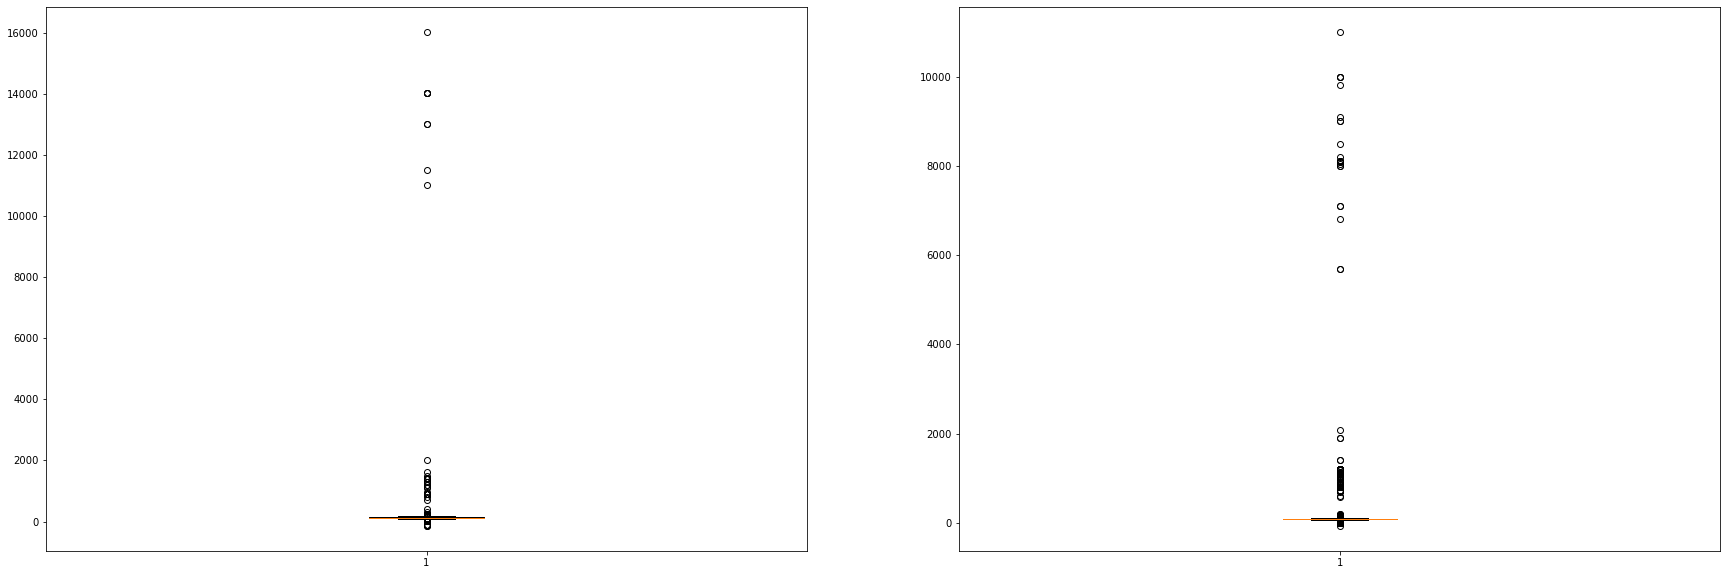

In [7]:
df = cardio_train.drop(['age','id'],axis=1)
feat = df.columns

# les outliers de ap_hi et ap_low sont des valeurs abberrantes. Après recherche, la valeur de la pression artérielle 1) ne 
# peut pas être négative; 2) ne peut excéder le 10^2 mmHg ===> prise en charge des valeurs abberrantes et choix du standardiseur
plt.figure(figsize=(30,10))
plt.subplot(121)
plt.boxplot(df['ap_hi'])

plt.subplot(122)
plt.boxplot(df['ap_lo'])
plt.show


Les valeurs abberrantes de ap (hi et low) sont abberrantes (https://www.srlf.org/wp-content/uploads/2020/03/2020-FP-Circu_Interpretation_signal_pression_arterielle.pdf). 

**Il est à noter que ces valeurs abberrantes pourraient sensiblement affecter la précision du modèle** => nous verrons dans la suite de ce notebook qu'il existe une méthode de standardisation des données permettant de minimiser les effets des valeurs abberrantes

Sources d'erreurs potentielles : mauvaise conversion des données, unités différentes

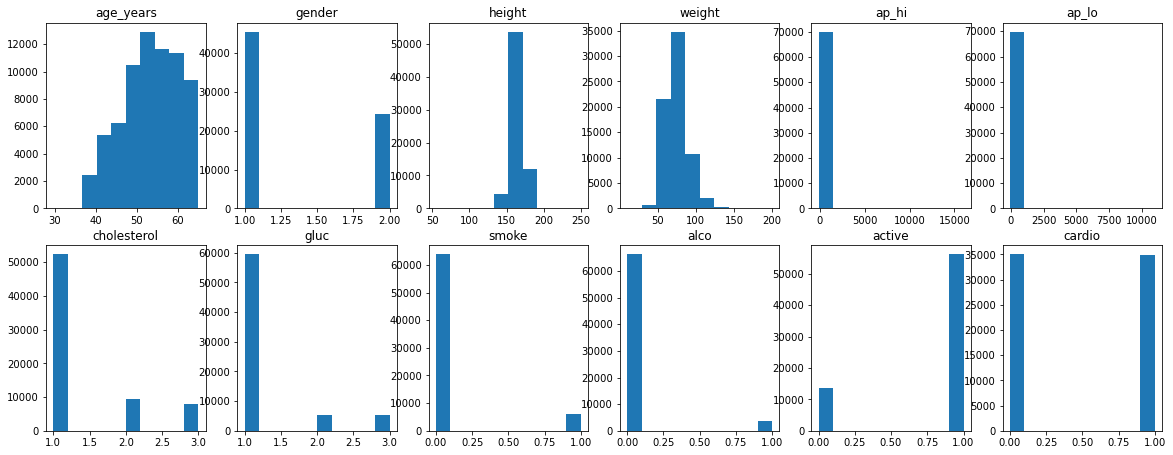

In [8]:
k = 0
fig = plt.figure(figsize=(20, 7.5))

for i in feat:
    if k < 12:
        k += 1
        ax = fig.add_subplot(2,6,k)
        ax.hist(df[str(i)])
        ax.set_title(str(i))


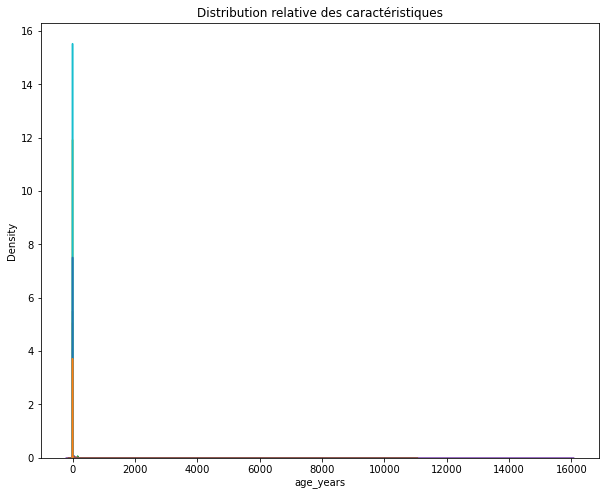

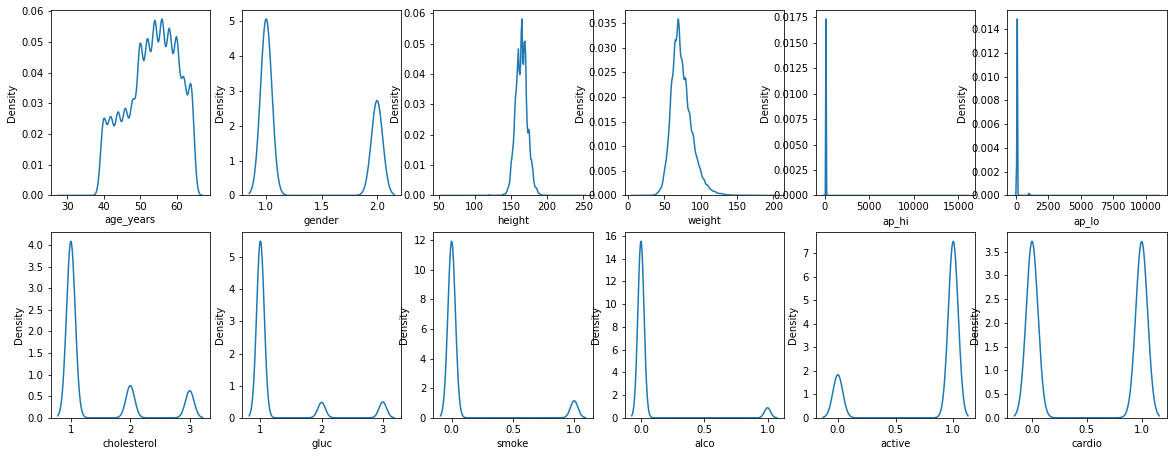

In [9]:
# distribution des observation avec seaborn
fig1, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Distribution relative des caractéristiques')
k1 = 0

for i in feat:
    sns.kdeplot(df[str(i)], ax=ax1)

fig2 = plt.figure(figsize=(20, 7.5))
for i in feat:
    if k1 < 12:
        k1 += 1
        ax2 = fig2.add_subplot(2,6,k1)
        sns.kdeplot(df[str(i)], ax=ax2)

Ce graphe permet de mettre en évidence la disproportion entre les distributions de chaque caractérstique! En effet l'ordre de grandeur des variables (=> plage de valeurs) varie entre 1 et 1*10^4

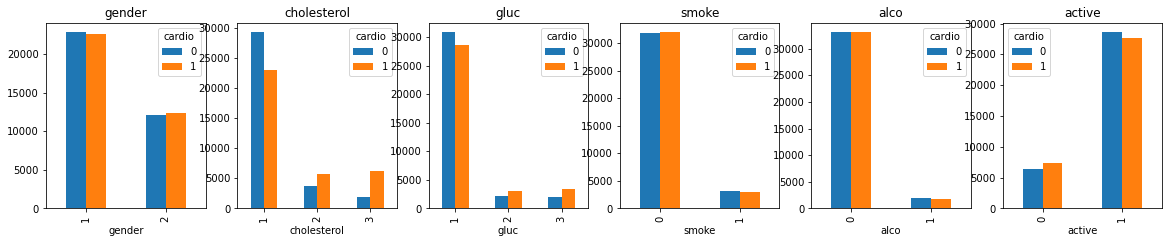

In [10]:
# pd.crosstab(df.drop(['cardio'], axis=1),df['cardio']).plot(kind='bar')
x = df.drop(['age_years','cardio','height','weight','ap_hi','ap_lo'], axis=1)
x_names = x.columns
y_bis = df['cardio']


k = 0
fig = plt.figure(figsize=(20, 7.5))

for i in x_names:
    if k < 11:
        k += 1
        ax3 = fig.add_subplot(2,6,k)
        pd.crosstab(df[str(i)],y_bis).plot(kind='bar',ax=ax3)
        ax3.set_title(str(i))



Il semblerait que les personnes présentant un taux de cholestérol et une glycémie au dessus de la normale soient plus sujettes à des maladies cardiovasculaires.

<function matplotlib.pyplot.show(close=None, block=None)>

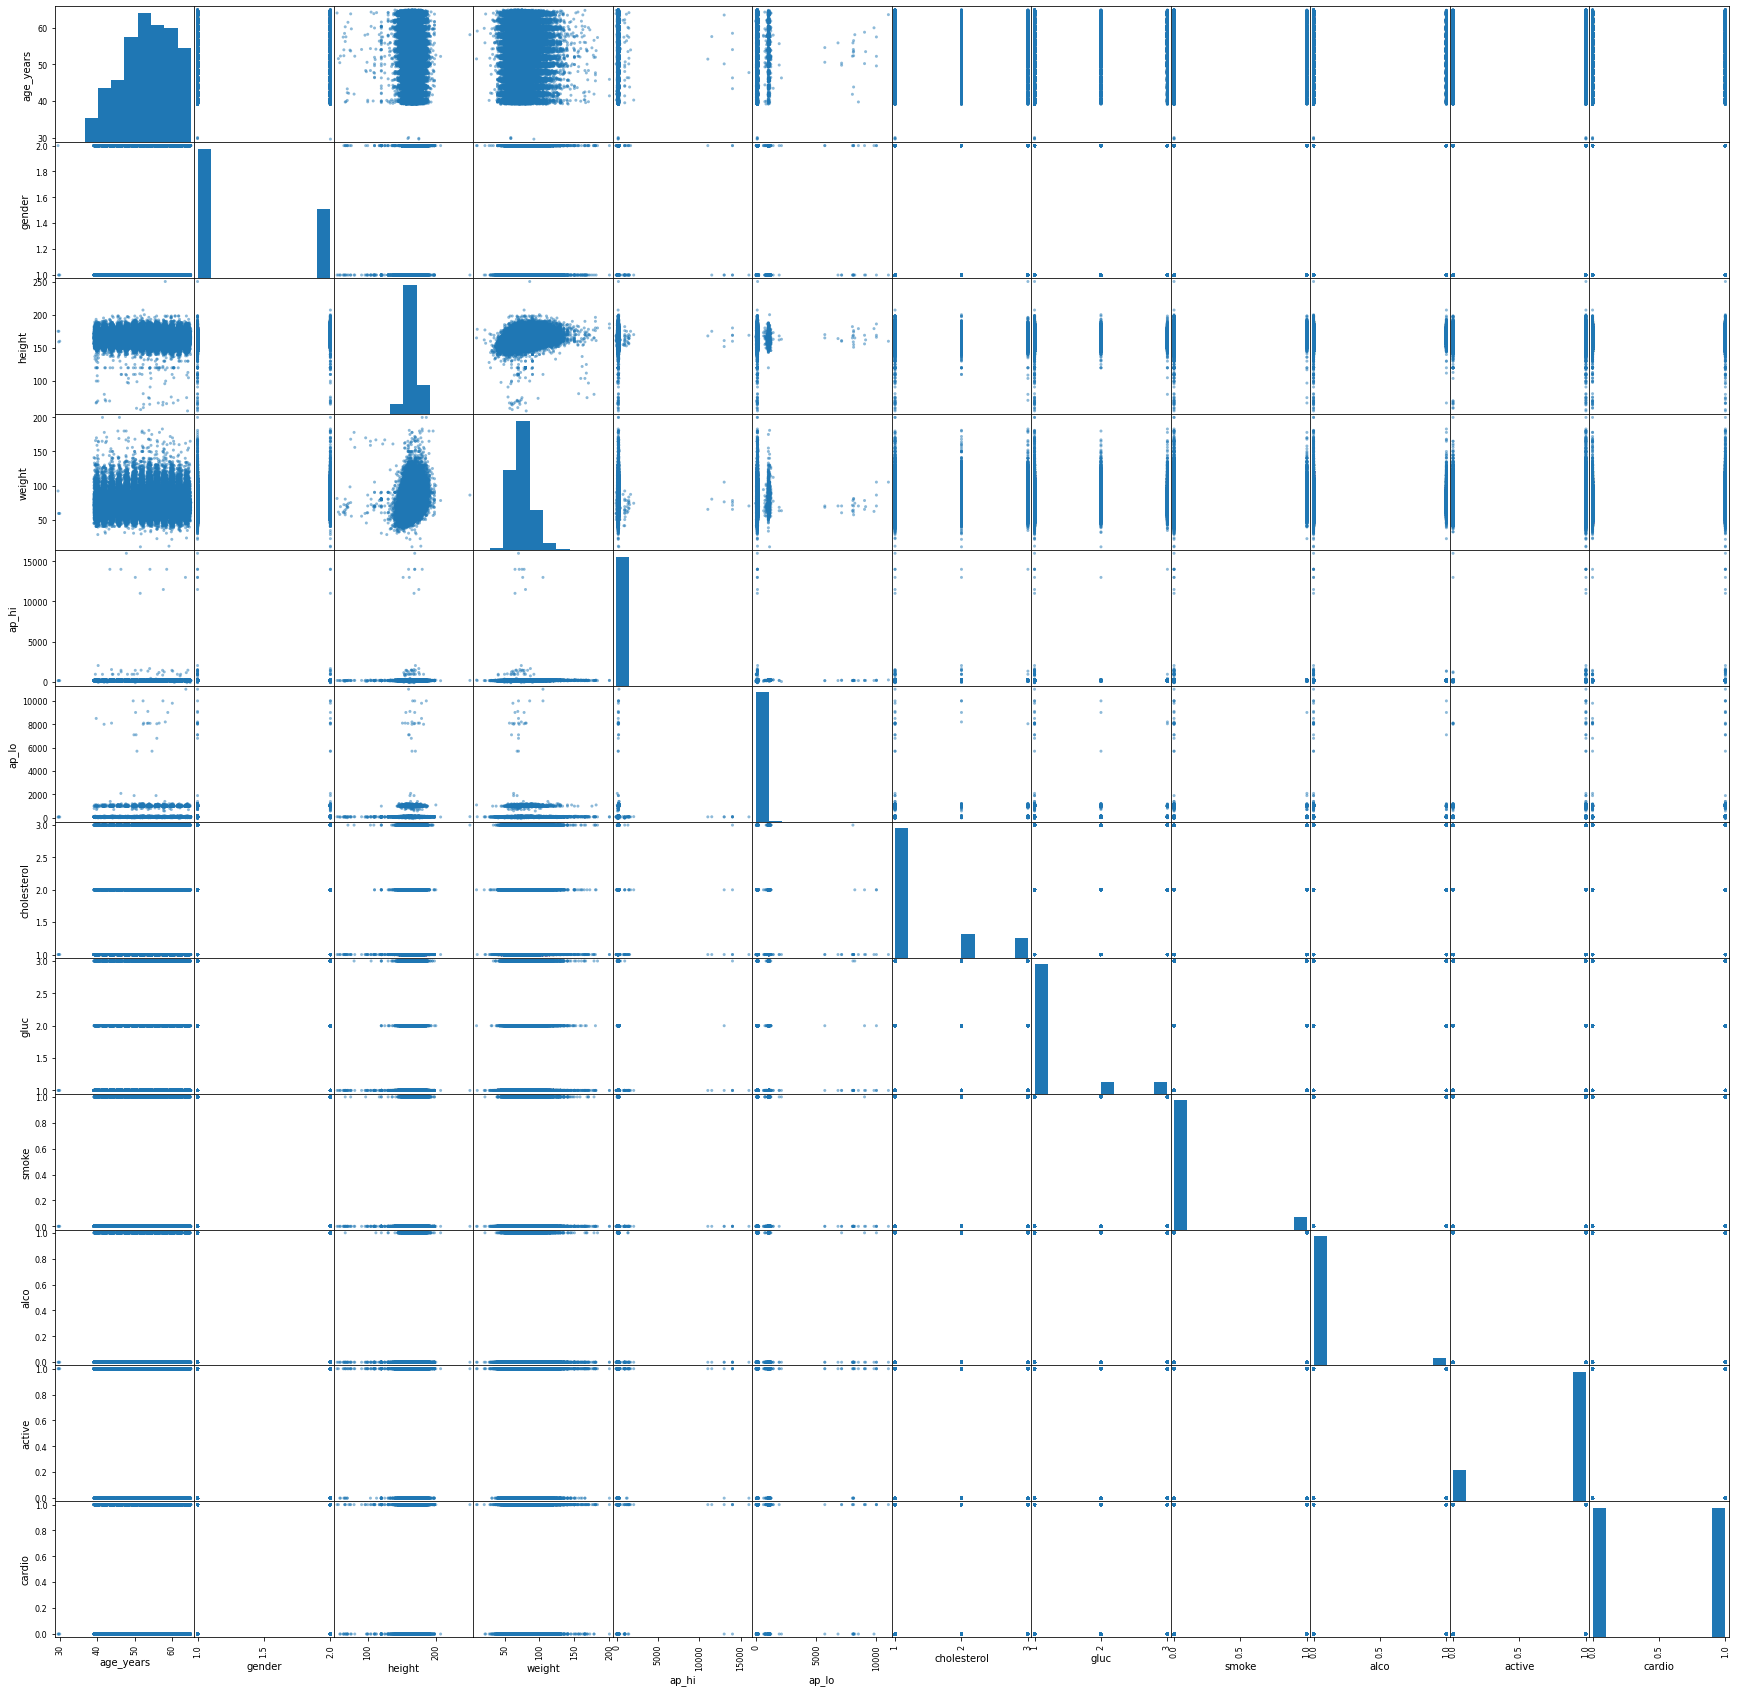

In [11]:
#corrélation entre variables
pd.plotting.scatter_matrix(df,figsize=(30,30))
plt.show

*REMARQUE: ce type de représentation n'est pas la plus optimale lorsqu'il s'agit d'étudier la corrélation entre de nombreuses variables comme c'est le cas ici*
Optons alors pour la matrice de corrélation de seaborn

             age_years    gender    height    weight     ap_hi     ap_lo  \
age_years     1.000000 -0.022811 -0.081515  0.053684  0.020764  0.017647   
gender       -0.022811  1.000000  0.499033  0.155406  0.006005  0.015254   
height       -0.081515  0.499033  1.000000  0.290968  0.005488  0.006150   
weight        0.053684  0.155406  0.290968  1.000000  0.030702  0.043710   
ap_hi         0.020764  0.006005  0.005488  0.030702  1.000000  0.016086   
ap_lo         0.017647  0.015254  0.006150  0.043710  0.016086  1.000000   
cholesterol   0.154424 -0.035821 -0.050226  0.141768  0.023778  0.024019   
gluc          0.098703 -0.020491 -0.018595  0.106857  0.011841  0.010806   
smoke        -0.047633  0.338135  0.187989  0.067780 -0.000922  0.005186   
alco         -0.029723  0.170966  0.094419  0.067113  0.001408  0.010601   
active       -0.009927  0.005866 -0.006570 -0.016867 -0.000033  0.004780   
cardio        0.238159  0.008109 -0.010821  0.181660  0.054475  0.065719   

           

<AxesSubplot:>

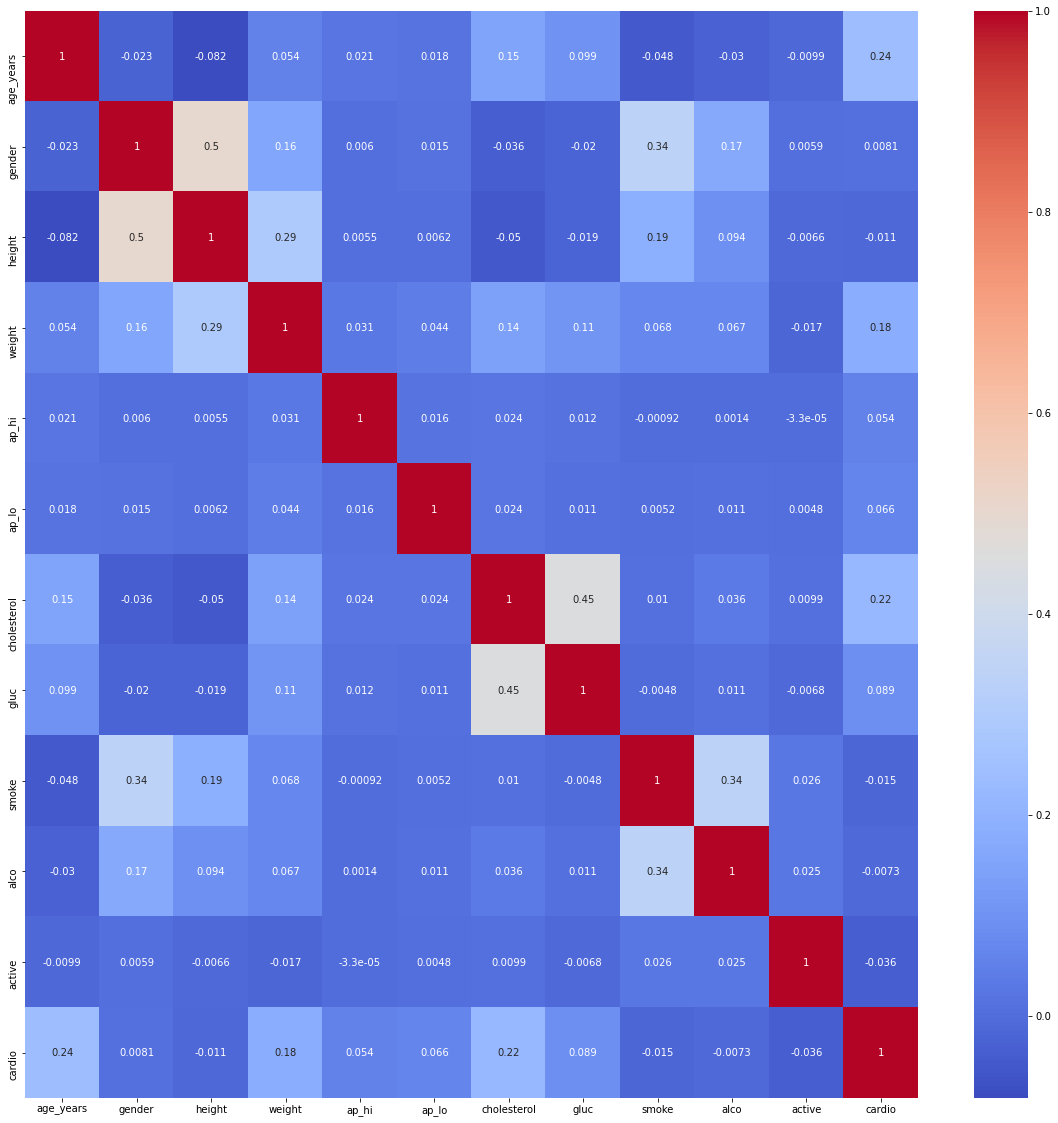

In [12]:
cor_med = df.corr()
print(cor_med)

fig, ax = plt.subplots(figsize=(20,20)) # ligne pour agrandir le plot
sns.heatmap(cor_med, annot=True, cmap ="coolwarm", ax=ax)

Avec cette représentation les variables qui sont les plus liées se démarquent grâce à l'échelle de couleur! En particulier, la taille et le gendre, le glucose et le cholestéro et à moindre mesure le facteur fumeur et le gendre.

En l'occurence, le heatmap met également en évidence que la variable cible CARDIO_DISEASE (cardio) est plus sensible au cholestérol, le poids et l'âge ==> le risque cardiovasculaire augmenterait donc avec l'âge, le taux de cholestérol et le poids.

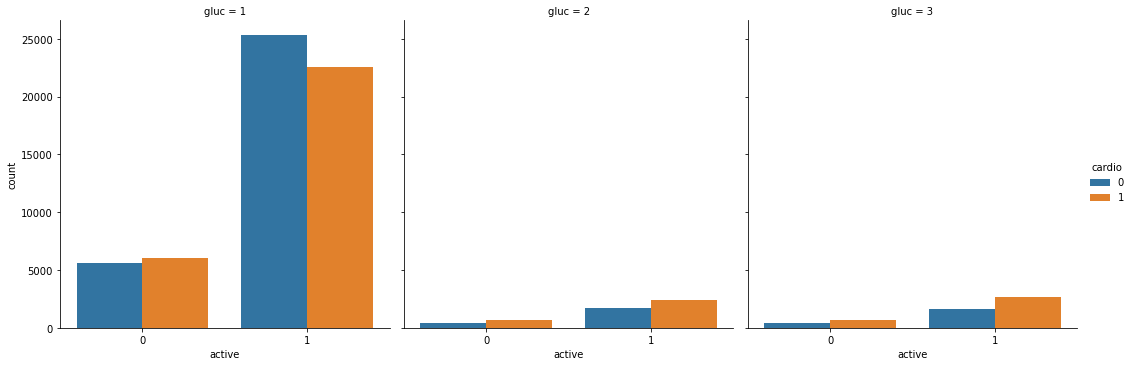

In [13]:
sns.catplot(x='active', kind='count', data=df, hue = 'cardio', col='gluc')

,age_years,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
gender,,,,,,,,,,,
1,45530,45530,45530,45530,45530,45530,45530,45530,45530,45530,45530
2,24470,24470,24470,24470,24470,24470,24470,24470,24470,24470,24470


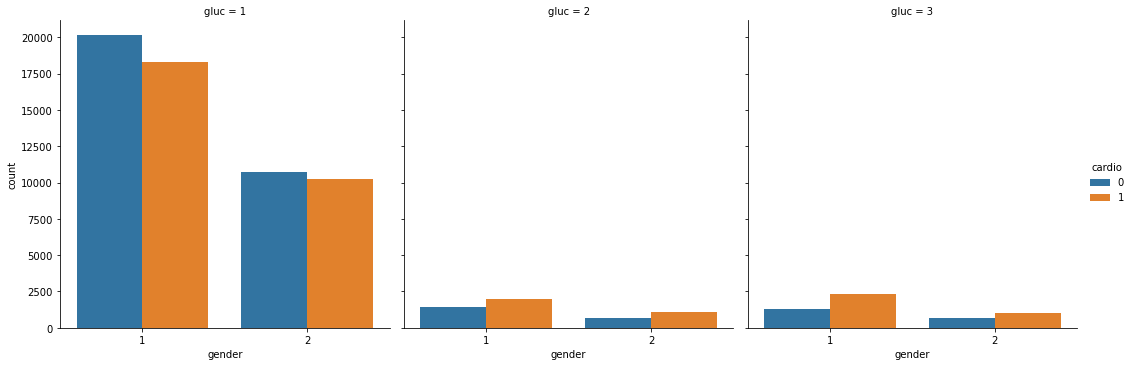

In [14]:
sns.catplot(x='gender', kind ='count', data=df, hue = 'cardio', col='gluc')
# avec 1 = femme ; 2 = homme 
df.groupby('gender').count()

#cette commande permet de confirmer que nb femme > nb homme; deux fois plus; ce qui peut potentiellement fausser l'étude. 
#Intérêt de normaliser? 

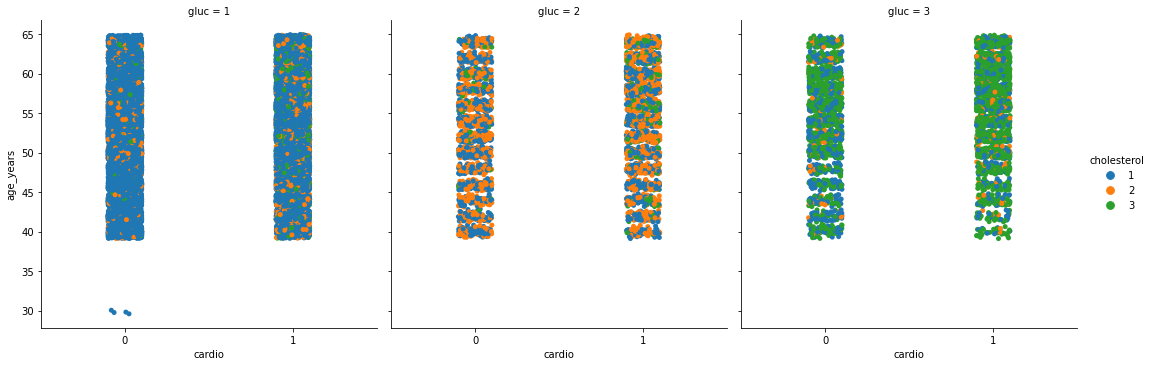

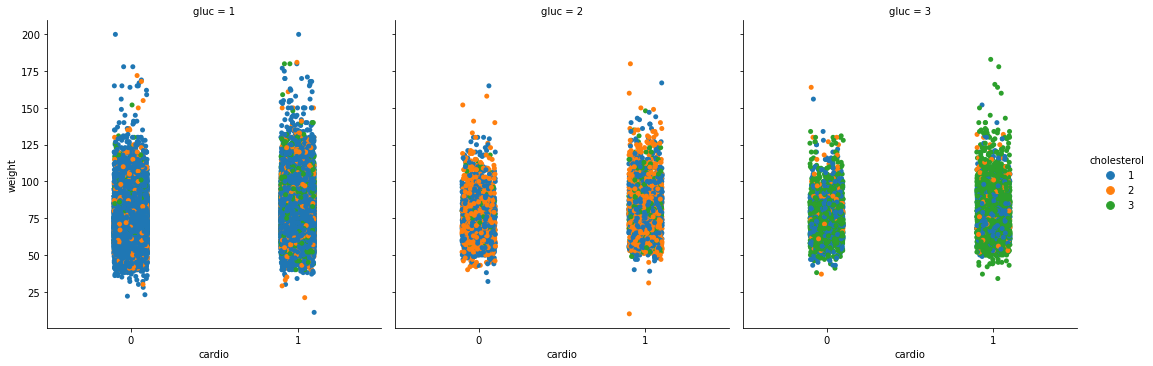

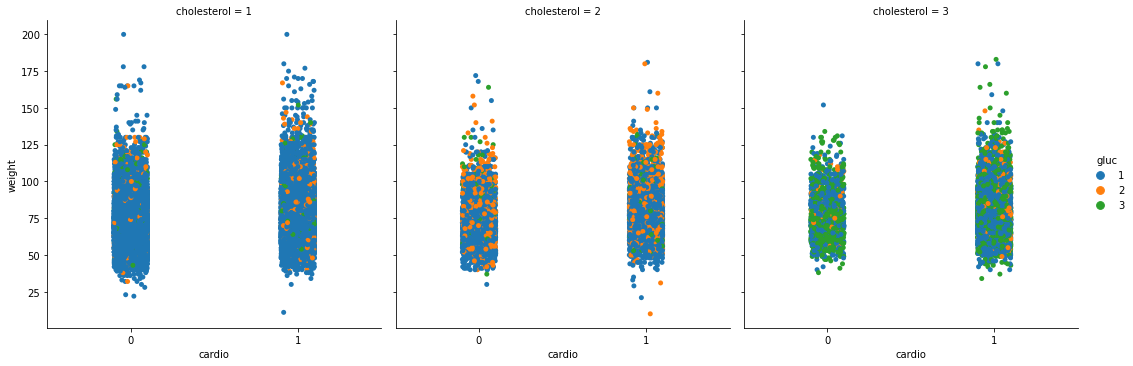

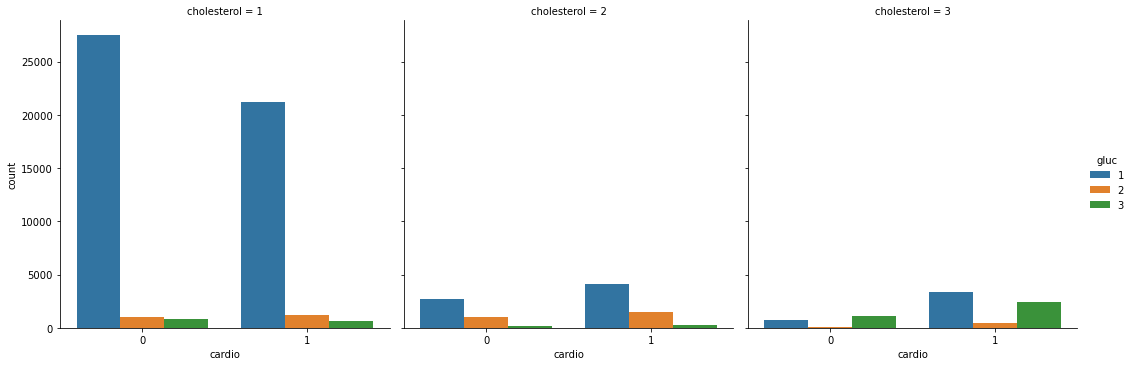

In [15]:
sns.catplot(x='cardio', y='age_years', data=df, col = 'gluc', hue='cholesterol')
sns.catplot(x='cardio', y='weight', data=df, col = 'gluc', hue='cholesterol')
sns.catplot(x='cardio', y='weight', data=df, col='cholesterol', hue='gluc')
sns.catplot(x='cardio', kind = 'count', data=df, col='cholesterol', hue='gluc')

Ce type de graphe est intéressant pour évaluer l'influence de variables l'une sur l'autre. En l'occurence on peut mettre en évidence le lien entre la glycémie et le cholestérol. En revanche l'influence de l'âge, la taille sur la risque cardiovasculaire. On suppose aussi (sous réserve de justifier la différence significative) que les sportifs présentant une glycémie au de la normale sont plus suceptibles d'être des sujets à risque.

### 2. Régression Logistique avec Scikit Learn

* **Quel "standardiseur" pour quel cas** : https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

En résumé : scikit learn propose 4 types de standardiseurs :
1. MinMaxScaler => bon pour mise à l'échelle stricte ; l'écart entre les valeur est conservé ; ne minimise pas les valeurs abberrantes
2. RobusteScaler => minimise les valeurs aberrantes ; l'écart entre les valeurs n'est pas conservé
3. StandardScaler => transforme la distribution en centrée (m=0) réduite (sigma = 0) => loi normale ; l'écart entre les valeurs n'est pas conservé; "Les algorithmes de type régression bénéficient également de données normalement distribuées avec des échantillons de petite taille"
4. Normalizer => normalisation L2 (somme des carrés des xi pour chaque observation i = 1) ou L1 ; déconseillé ; appliqué à chaque ligne (faire attention à la validité!); intérêt? 

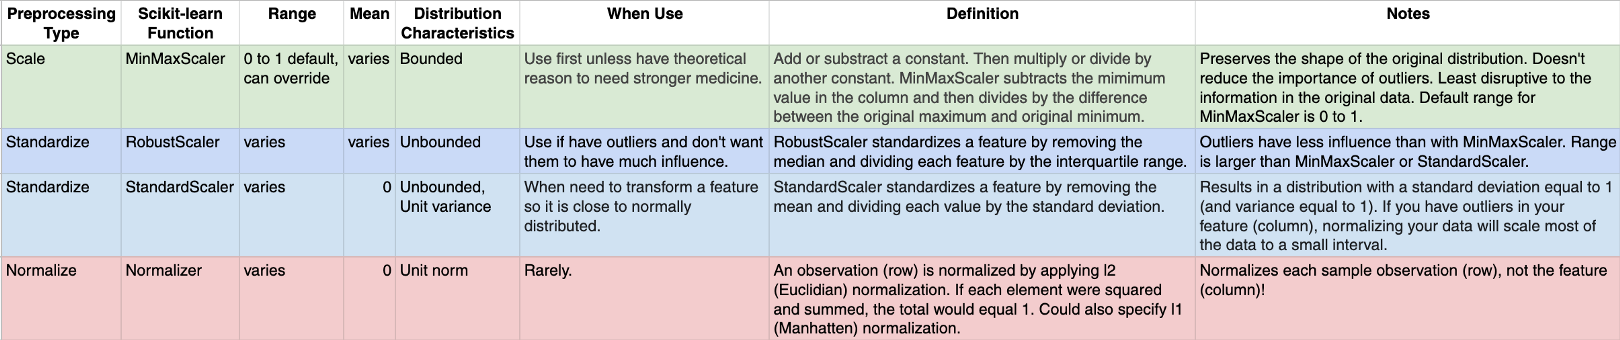

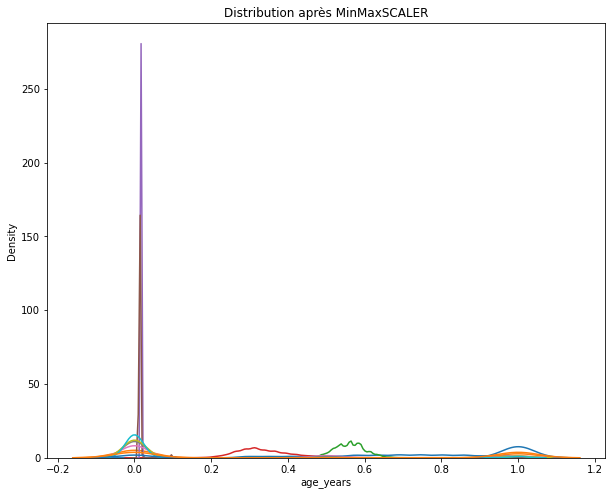

In [129]:
# Classification avec scikit learn 

# étape 1 : standardisation
min_max = preprocessing.MinMaxScaler()
df_scale = min_max.fit_transform(df)
df_scale = pd.DataFrame(df_scale, columns=feat)

fig3, (ax3) = plt.subplots(ncols=1, figsize=(10, 8))
ax3.set_title('Distribution après MinMaxSCALER')

for i in feat:
    sns.kdeplot(df_scale[str(i)], ax=ax3, legend=True)
#comprendre pourquoi la légende ne s'affiche pas et xlabel

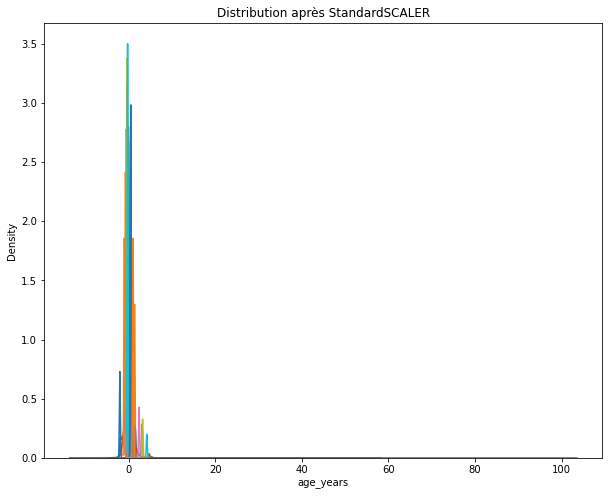

In [17]:
stand = preprocessing.StandardScaler()
df_stand = stand.fit_transform(df)
df_stand = pd.DataFrame(df_stand, columns=feat)

rob = preprocessing.RobustScaler()
df_rob = rob.fit_transform(df)
df_rob = pd.DataFrame(df_rob, columns=feat)

fig3, (ax4) = plt.subplots(ncols=1, figsize=(10, 8))
ax4.set_title('Distribution après StandardSCALER')

for i in feat:
    sns.kdeplot(df_stand[str(i)], ax=ax4, legend=True)

Le test sur notre dataset confirme ce que la veille sur les différents process de standardisation de scikit learn a mit en évidence 
* Le minmax conserve les écarts relatifs entre observation et réduit l'intervalle des valeurs à une plage de données beaucoup plus restreinte que standardscaler. 
* En contre-partie, standard scaler a le mérite de transformer le jeu de données en distribution normale centrée réduite, ce qui peut s'avérer utile dans certains algo de régression! 

**Quelle configuration est la plus adaptée à notre situation?** 

In [18]:
# from sklearn.utils import shuffle # voir remarques
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import utils

# Initialisation du modèle 
LR = LogisticRegression(solver='liblinear', C=20.0)

def logreg(data):
    X = data.drop(['cardio'], axis=1)
    y = data['cardio']
    
    # Split & shuffle
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
    
    if utils.multiclass.type_of_target(y_train) or utils.multiclass.type_of_target(y_test)== 'continuous':
        lab_enc = preprocessing.LabelEncoder()
        y_train = lab_enc.fit_transform(y_train)
        y_test = lab_enc.fit_transform(y_test)

    model = LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)
    y_pred = pd.DataFrame(y_pred)

    score = LR.score(X_test, y_test)
    return score
    
print(logreg(df_stand))

0.7197835497835497


without stand : 0.7198701298701299
min max scaler : 0.6683549783549784
stand scaler : 0.7197835497835497
rob scaler : 0.7198701298701299


Text(0.5, 1.0, 'Comparaison des différents standardiseurs')

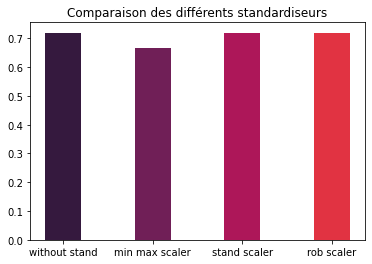

In [256]:
df_names = [df, df_scale, df_stand, df_rob]
stand_names = ['without stand', 'min max scaler', 'stand scaler','rob scaler']
scores = []
for i in range(len(df_names)):
    acc = logreg(df_names[i])
    scores.append(acc)
    print(stand_names[i],':', acc)
    
plt.bar(np.arange(len(df_names)), scores, width= 0.4, color=sns.color_palette("rocket"))
plt.xticks(np.arange(len(df_names)),stand_names)
plt.title('Comparaison des différents standardiseurs')

Ce graphe permet de mettre en évidence qu'on obtient une précision moins importante après standardisation avec le minmaxscaler comparé à la distribution d'origine

In [20]:
# from sklearn.utils import shuffle # voir remarques
X = df_scale.drop(['cardio'], axis=1)
y = df_scale['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

# y_train = label, target du train 
# test: X_test.shape
if utils.multiclass.type_of_target(y_train) or utils.multiclass.type_of_target(y_test)== 'continuous':
    lab_enc = preprocessing.LabelEncoder()
    y_train = lab_enc.fit_transform(y_train)
    y_test = lab_enc.fit_transform(y_test)

# Initialisation du modèle 
LR = LogisticRegression(solver='liblinear', random_state=0, C=20.0)

# Entraînement du modèle sur les échantillons d'entraînement (features : X_train, labels: y_train)
model = LR.fit(X_train, y_train)

# Prédiction sur les données test
y_pred = LR.predict(X_test)
y_pred = pd.DataFrame(y_pred)

In [21]:
# Paramètres du modèle 
coef = LR.coef_
intercept = LR.intercept_
print('Coefficient: ', coef,'\n')
print('Intercept: '+'\n', intercept,'\n')

# Evaluation du modèle 
score = LR.score(X_test, y_test) # on calcule le score avec les labels test ou prédits? 
proba = LR.predict_proba(X_test)
proba[:10,:]

cm = confusion_matrix(y_test, y_pred)
print('Score: ', score,'\n')
print('Matrice de confusion: '+'\n', cm,'\n')

# Vérification que somme des observations matrice de confusion = échantillon test
# total = cm[1][0]+cm[0][0]+cm[1][1]+cm[0][1]
# print(total)
# print(y_test.shape[0])



# print(type(cm[0][0]))
# cm en integer => nécessité de transformer cm en float pour pouvoir calculer pourcentage
cm = np.array(cm, dtype=float)

# Matrice de confusion en pourcentage 
y_tot = y_test.shape[0]
for i in range(len(cm)):
    for j in range(len(cm[0])):
        cm[i][j] = round(cm[i][j]*100/y_tot)
        
print('Matrice de confusion (%): '+'\n',np.array(cm,dtype =int), '\n')
print(classification_report(y_test, y_pred))


Coefficient:  [[ 2.19578058e+00  8.44123696e-02 -2.03725471e+00  4.26569930e+00
   8.76807236e+01  1.07926523e+01  1.20478712e+00 -2.25346502e-01
  -9.87244825e-02 -1.83032004e-01 -1.65740881e-01]] 

Intercept: 
 [-3.4972833] 

Score:  0.6683549783549784 

Matrice de confusion: 
 [[8074 3432]
 [4229 7365]] 

Matrice de confusion (%): 
 [[35 15]
 [18 32]] 

              precision    recall  f1-score   support

           0       0.66      0.70      0.68     11506
           1       0.68      0.64      0.66     11594

    accuracy                           0.67     23100
   macro avg       0.67      0.67      0.67     23100
weighted avg       0.67      0.67      0.67     23100



***Remarques***<br/>
Il existe plusieurs type de shuffling : 
* **np.random.permutation** (pour mélanger les index des données => cf TP math digitalLab) 
* **ShuffleSplit** (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) pour la cross-validation: on scinde (split) l'échantillon en sous échantillons répartis aléatoirement en train ou test n fois. Permet de ajuster le modèle puisqu'on teste sur plusieurs types de données test? 
* **ShuffleSplit bis** (https://scikit-learn.org/0.15/modules/generated/sklearn.cross_validation.ShuffleSplit.html) pareil que la précédente de ce que j'ai compris
* **StratifiedShuffleSplit**: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html 

### 3. Implémentation de ma propre régression logistique

**Implémentation de la régression logistique : descente de gradient**
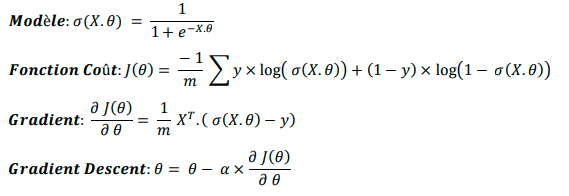

In [23]:
#Initialisation des paramètres
# Finalement utilisons les données standardisées avec le minmax_scaler pour avoir des données comprises entre 0 et 1; 
# nous avions une meilleure perf avec le standscaler mais --> division par zéro

ones = np.ones(len(X_train)).reshape(len(X_train),1)
X_mat = np.concatenate((ones,X_train), axis=1)
y_mat = y_train.reshape(len(y_train),1)

#Création d'un théta quelconque à partir duquel va démarrer la descente de gradient
theta = np.ones((X_mat.shape[1],1))
print(X_train.shape)

(46900, 11)


In [24]:
df_scale.describe()
# toutes les données du dataset sont comprises entre 0 et 1

,age_years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.671379,0.349571,0.560817,0.337925,0.017243,0.015052,0.183436,0.113229,0.088129,0.053771,0.803729,0.499700
std,0.191038,0.476838,0.042103,0.075767,0.009525,0.017026,0.340125,0.286135,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.531630,0.000000,0.533333,0.289474,0.016698,0.013550,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.689508,0.000000,0.564103,0.326316,0.016698,0.013550,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.815254,1.000000,0.589744,0.378947,0.017934,0.014453,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [244]:
class MyLogReg:
    def __init__(self,X,Y):
        self.y = Y.reshape(len(Y),1)
        ones = np.ones(len(X)).reshape(len(X),1)
        self.X = np.concatenate((ones,X), axis=1)

    #fonction sigmoïde logistique
    def sigma(X, theta):
        return 1/(1 + np.exp(-X.dot(theta)))
 
    #fonction de coût
    def J(X, y, theta):
        m = len(y)
        return -1/m * np.sum((self.y*np.log(sigma(self.X, theta))+(1-self.y)*np.log(1-sigma(self.X, theta))))

    def grad(X, y, theta):
        m = len(y)
        return 1./m * self.X.T.dot(sigma(self.X, theta) - self.y)
 
    def d_grad(self, theta, learning_rate, n_iterations):
        # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
        cost_history = np.zeros(n_iterations) 
        
        for i in range(0, n_iterations):
            theta = theta - learning_rate * grad(self.X, self.y, theta) # mise a jour du parametre theta (formule du gradient descent)
            cost_history[i] = J(self.X, self.y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

        return theta, cost_history

    #fonction classification binaire
    def clf_binary(self, X, theta):
        self.proba = sigma(X, theta)
        predict = sigma(X, theta)
        for i in range(len(predict)):
            if predict[i]<0.5:
                predict[i]=0
            else:
                predict[i]=1
        return predict
    
    #fonction metrics pour calculer les paramètres d'évaluation du modèle
    def metrics(self, y_test, y_pred):
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for i in range(len(y_test)):
            if y_test[i] == 1: 
                if y_test[i] == y_pred[i]:
                    TP += 1
                else:
                    FN += 1
            else:
                if y_test[i] == y_pred[i]:
                    TN += 1
                else: 
                    FP += 1
        
        self.accuracy = (TP+TN)/len(y_test)      #precision = fraction d'échantillons prédite correctement
        self.recall = TP/(TP+FN)                 #rappel = sensitivité ; fraction d'événements positifs que vous avez correctement prédits
        self.precision = TP/(TP+FP)              #precision = fraction des événements positifs prédits qui sont réellement positifs
        self.cm = np.array([[TN,FP],[FN,TP]], dtype = int)
        
        return self.accuracy, self.recall, self.precision
    

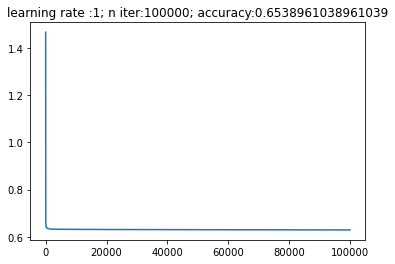

In [245]:
learning_rate = 1
n_iter = 10**5
theta = np.ones((X_mat.shape[1],1))
ones = np.ones(len(X_test)).reshape(len(X_test),1)
X_mat_test = np.concatenate((ones,X_test), axis=1)

mymod = MyLogReg(X_train,y_train)
theta_fin, historique = mymod.d_grad(theta, learning_rate, n_iter)
my_pred = mymod.clf_binary(X_mat_test,theta_fin)
acc, rap, prec = mymod.metrics(y_test, my_pred)
plt.plot(range(n_iter), historique)
plt.title('learning rate :{r}; n iter:{n}; accuracy:{s}'.format(r=learning_rate, n=n_iter, s=acc))
plt.show()

Pour tester ma régression logistique, le theta final est calculé au bout de 10^5 itérations avec un pas d'apprentissage de 1. La précision du modèle est de 0,65. 
**Mais comment évolue le modèle en fonction des paramètres fourni au modèle (ie learning rate, n iteration)?**

In [247]:
print('With my function: \n',mymod.cm)
print('')
print('With scikit learn function: \n',confusion_matrix(y_test, my_pred))
print('')
print('my acc:', round(acc,2)) 
print('my recall', round(rap,2)) 
print('my prec:', round(prec,2))
print(classification_report(y_test, my_pred))

With my function: 
 [[7918 3588]
 [4407 7187]]

With scikit learn function: 
 [[7918 3588]
 [4407 7187]]

my acc: 0.65
my recall 0.62
my prec: 0.67
              precision    recall  f1-score   support

           0       0.64      0.69      0.66     11506
           1       0.67      0.62      0.64     11594

    accuracy                           0.65     23100
   macro avg       0.65      0.65      0.65     23100
weighted avg       0.65      0.65      0.65     23100



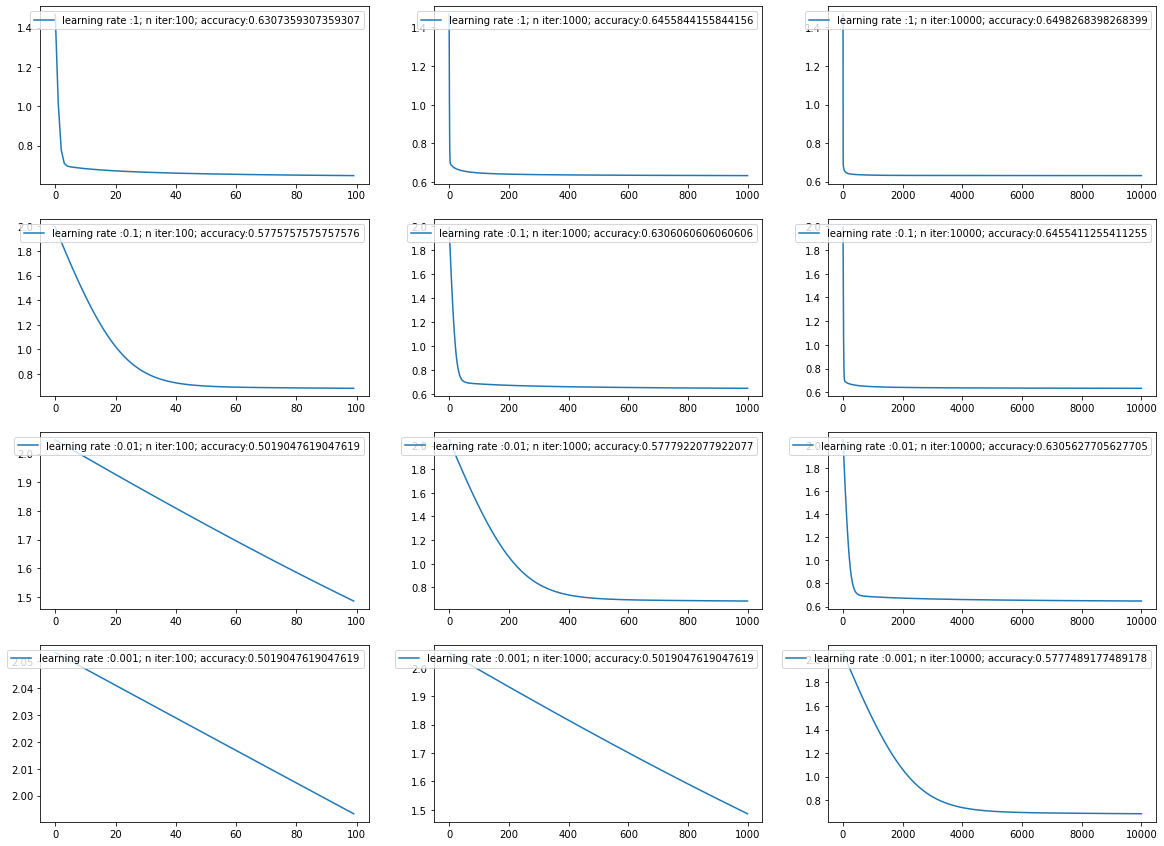

In [241]:
from sklearn.metrics import accuracy_score

learning_rate = [1, 10**(-1), 10**(-2),10**(-3)]
n_iter = [10**2,10**3,10**4]

ones = np.ones(len(X_test)).reshape(len(X_test),1)
X_mat_test = np.concatenate((ones,X_test), axis=1)

#comparaison des paramètres learning rate et n iteration
k=0
fig = plt.figure(figsize =(20, 15))

for r in range(len(learning_rate)):
    for n in range(len(n_iter)):
        if k < 12:
            k += 1
            ax = fig.add_subplot(4,3,k)
            theta_fin, historique = mymod.d_grad(theta, learning_rate[r], n_iter[n])
            my_pred = mymod.clf_binary(X_mat_test,theta_fin)
            acc, rap, prec = mymod.metrics(y_test, my_pred)
            ax.plot(range(n_iter[n]), historique, label = 'learning rate :{r}; n iter:{n}; accuracy:{s}'.format(r=learning_rate[r], n=n_iter[n], s=round(acc,2))
            ax.legend()


A "learning rate" constant, l'accuracy augmente avec le nombre d'itérations. Je suppose que plus le pas d'apprentissage est petit, plus le temps de calcul (=> nombre d'itérations) sera long car il mettre plus de temps à atteindre le maximum de vraisemblance (LLF = Σᵢ (𝑦ᵢ log (𝑝 (𝐱ᵢ)) + (1 - 𝑦ᵢ) log (1 - 𝑝 (𝐱ᵢ))). (On le voit à l'échelle des ordonnées que la valeur mnimale n'est pas atteinte). 
On met ici en évidence l'importance de trouver un bon compromis (rapport) nombre d'itération/pas pour otimiser le modèle.

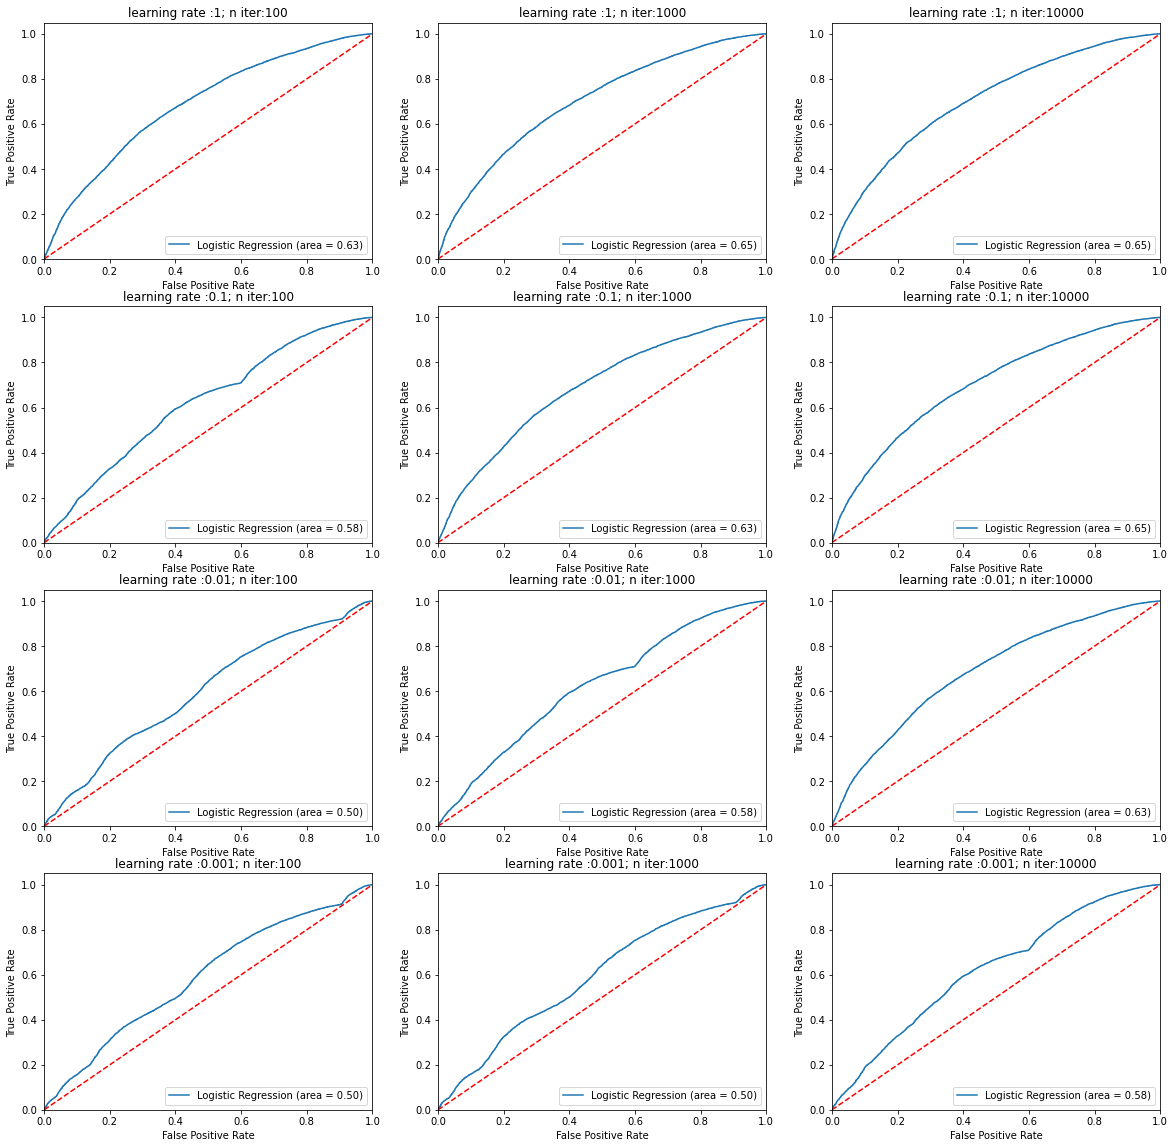

In [249]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 

learning_rate = [1, 10**(-1), 10**(-2),10**(-3)]
n_iter = [10**2,10**3,10**4]

fig = plt.figure(figsize =(20, 20))
k= 0
for r in range(len(learning_rate)):
    for n in range(len(n_iter)):
        if k < 12:
            k += 1
            ax = fig.add_subplot(4,3,k)
            theta_fin, historique = mymod.d_grad(theta, learning_rate[r], n_iter[n])
            my_pred = mymod.clf_binary(X_mat_test,theta_fin)
            logit_roc_auc = roc_auc_score (y_test, my_pred)
            fpr, tpr, seuils = roc_curve (y_test, mymod.proba)
            ax.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
            ax.plot([0, 1], [0, 1],'r--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('learning rate :{r}; n iter:{n}'.format(r=learning_rate[r], n=n_iter[n]))
            ax.legend(loc="lower right")

La courbe ROC est un bon moyen d'évaluer le modèle. Il faut que la courbe soit le plus éloigné possible de la courbe rouge et couvre une aire la plus grande possible

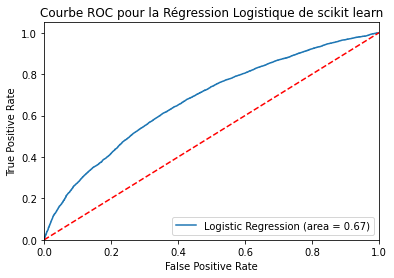

In [257]:
logit_roc_auc = roc_auc_score (y_test, y_pred)
fpr, tpr, seuils = roc_curve (y_test, LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC pour la Régression Logistique de scikit learn')
plt.legend(loc="lower right")

### 4. Etude de cas: 

Prédire si Arthur **53 ans, fumeur, sportif, 175 cm, 85 kg, avec un taux de cholestérol au dessus de la normal et un taux de glucose normal, une tension artérielle systolique dans la moyenne et une pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%)*** du jeu de données, est un sujet à risques cardio-vasculaires.

In [115]:
# Paramètres physiologiques d' Arthur
a_age = 53
a_smoke = 1
a_active = 1
a_height = 175
a_weight = 85.0
a_gender = 2
a_cholesterol = 2
a_gluc = 1
a_ap_hi = np.median(df['ap_hi']) # définition dans la moyenne? médiane ou moyenne => med(120) # moy(128.8)
a_ap_lo = np.mean(df['ap_lo'].quantile([0.5,0.75]))

In [255]:
X_arthur= np.array([a_age, a_gender, a_height, a_weight, a_ap_hi, a_ap_lo, a_cholesterol, a_gluc, a_smoke, 0, a_active])
X = df.drop(['cardio'], axis=1)

arthur_row = pd.DataFrame(X_arthur.reshape(1,-1), columns=X.columns)
# les caractéristiques physiologiques d'Arthur sont rajoutée à la fin du dataset
X_ = X.append(arthur_row,ignore_index=True)

#Pour standardiser les données d'Arthur, il faut les rajouter au dataset puis les extraire
X_artscale = min_max.fit_transform(X_)
X_artscale = pd.DataFrame(X_artscale, columns=X.columns)

# Données d'Arthur standardisées
# Prédiction avec scikit learn
X_art_scale = X_artscale.iloc[[-1]]
y_art = LR.predict(X_art_scale)
proba_art = LR.predict_proba(X_art_scale)

if y_art == 1:
    print('Arthur est un sujet à risque avec une probabilité de %0.2f' % proba_art[0][1])
else:
    print('Arthur ne présente pas de risque cardiovasculaire avec une probabilité de %0.2f' % proba_art[0][0])
    

# Prédiction avec mon modèle
X_art_scale.insert(0, 0, 0)
my_y_art = mymod.clf_binary(X_art_scale.values,theta_fin)

if my_y_art[0][0] == 1:
    print('D\' après mon modèle, Arthur est un sujet à risque avec une probabilité de %0.2f' % mymod.proba[0][0])
else:
    print('D\' après mon modèle, Arthur ne présente pas de risque cardiovasculaire avec une probabilité de %0.2f' % % mymod.proba[0][0])

Arthur est un sujet à risque avec une probabilité de 0.60
D' après mon modèle, Arthur est un sujet à risque avec une probabilité de 0.81
